<a href="https://colab.research.google.com/github/casjunior93/projeto-integrador-iv/blob/main/PI_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas fundamentais

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

#Semente aleatória do Numpy
np.random.seed(42)

#Data local
import locale
# Colab não suporta
#locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

# URL base da api de dados

In [2]:
url_base = 'https://univesp-analytics.vercel.app/api/get'

# Lendo Json com Pandas

In [3]:
import urllib.request, json 
from pandas.io.json import json_normalize

In [4]:
%%time
fim_iteracao_api = False
pagina = 1
df_dados_api_original = pd.DataFrame([])

while fim_iteracao_api == False:
  print(f'Início leitura página {pagina}')
  with urllib.request.urlopen(url_base + '?page=' + str(pagina)) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(json_normalize(data))
    if len(data) == 0:
      print(f'Fim. Total de {pagina - 1} páginas.')
      fim_iteracao_api = True
    else:  
      print(f'Fim leitura página {pagina}')
      pagina += 1
      df_dados_api_original = pd.concat([df_dados_api_original, df], ignore_index = True)

Início leitura página 1
Fim leitura página 1
Início leitura página 2
Fim leitura página 2
Início leitura página 3
Fim leitura página 3
Início leitura página 4
Fim leitura página 4
Início leitura página 5
Fim leitura página 5
Início leitura página 6
Fim leitura página 6
Início leitura página 7
Fim leitura página 7
Início leitura página 8
Fim leitura página 8
Início leitura página 9
Fim leitura página 9
Início leitura página 10
Fim leitura página 10
Início leitura página 11
Fim leitura página 11
Início leitura página 12
Fim leitura página 12
Início leitura página 13
Fim leitura página 13
Início leitura página 14
Fim leitura página 14
Início leitura página 15
Fim leitura página 15
Início leitura página 16
Fim leitura página 16
Início leitura página 17
Fim leitura página 17
Início leitura página 18
Fim leitura página 18
Início leitura página 19
Fim leitura página 19
Início leitura página 20
Fim leitura página 20
Início leitura página 21
Fim leitura página 21
Início leitura página 22
Fim le

Cópia dos dados da api

In [25]:
df_dados_api = df_dados_api_original.copy()

Dimensão dos dados - Linhas, colunas

In [26]:
df_dados_api.shape

(8465, 8)

# Visualizando dados originais

Cinco primeiros registros do dataframe - Em ordem da disposição na API

In [27]:
df_dados_api.head()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora,teste
0,641ef3de5a776e57f6a5ea51,26.70,52.00,teste,"25/03/2023, 10:15:10","25/03/2023,",10:15:10,NaN
1,641ef3b45a776e57f6a5ea50,26.70,52.00,teste,"25/03/2023, 10:14:28","25/03/2023,",10:14:28,NaN
2,641ef38a5a776e57f6a5ea4f,26.70,52.00,teste,"25/03/2023, 10:13:46","25/03/2023,",10:13:46,NaN
3,641ef3605a776e57f6a5ea4e,26.70,52.00,teste,"25/03/2023, 10:13:04","25/03/2023,",10:13:04,NaN
4,641ef3365a776e57f6a5ea4d,26.70,52.00,teste,"25/03/2023, 10:12:22","25/03/2023,",10:12:22,NaN


Cinco últimos registros do dataframe

In [28]:
df_dados_api.tail()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora,teste
8460,63ffed2b38c8784e07b788f2,15,15,teste,01/03/2023 21:26:19,01/03/2023,21:26:19,NaN
8461,63ffdea6722bef68acc5bb72,333,333,teste,2023-03-01T23:24:21.438Z,01/03/2023,23:24:21,NaN
8462,63ffdbde1a4eb0dfdd6a11a8,10,10,teste,2023-03-01T23:12:30.063Z,01/03/2023,20:12:30,NaN
8463,63ffdbb91a4eb0dfdd6a11a7,2,3,teste,2023-03-01T23:11:53.036Z,01/03/2023,20:11:53,NaN
8464,63fea0720dd58484fc266c80,NaN,NaN,NaN,NaN,NaN,NaN,123.00


Verificando dados nulos

In [30]:
df_dados_api.isnull().sum()

_id                0
temp_ar            3
umid_ar            3
type               1
time.time_js       1
time.data          1
time.hora          1
teste           8464
dtype: int64

Excluindo colunas desnecessárias

In [31]:
del df_dados_api['teste']
del df_dados_api['_id']
del df_dados_api['type']
del df_dados_api['time.time_js']
df_dados_api.head()

,temp_ar,umid_ar,time.data,time.hora
0,26.70,52.00,"25/03/2023,",10:15:10
1,26.70,52.00,"25/03/2023,",10:14:28
2,26.70,52.00,"25/03/2023,",10:13:46
3,26.70,52.00,"25/03/2023,",10:13:04
4,26.70,52.00,"25/03/2023,",10:12:22


Limpeza de dados nulos

In [32]:
df_dados_api.dropna(inplace = True)
df_dados_api.isnull().sum()

temp_ar      0
umid_ar      0
time.data    0
time.hora    0
dtype: int64

Removendo dados duplicados

In [33]:
df_dados_api.shape

(8462, 4)

In [34]:
df_dados_api.drop_duplicates(inplace=True, ignore_index=True)
df_dados_api.shape

(8458, 4)

# Tratando data

Copiando dataframe para uma nova variável

In [35]:
dados_projeto = df_dados_api.copy()
dados_projeto

,temp_ar,umid_ar,time.data,time.hora
0,26.70,52.00,"25/03/2023,",10:15:10
1,26.70,52.00,"25/03/2023,",10:14:28
2,26.70,52.00,"25/03/2023,",10:13:46
3,26.70,52.00,"25/03/2023,",10:13:04
4,26.70,52.00,"25/03/2023,",10:12:22
...,...,...,...,...
8453,333.00,333.00,"01/03/2023,",21:28:38
8454,15,15,01/03/2023,21:26:19
8455,333,333,01/03/2023,23:24:21
8456,10,10,01/03/2023,20:12:30


Removendo virgula de time.data e concatenando com time.hora para gerar data no formato datetime

In [38]:
def converte_data_portugues_para_ingles(df):
  return datetime.strptime(df['time.data'], "%d/%m/%Y").strftime("%Y-%m-%d");

In [39]:
dados_projeto['time.data'] = dados_projeto['time.data'].str.replace(',','')
dados_projeto['time.data'] = dados_projeto.apply(lambda x: converte_data_portugues_para_ingles(x), axis=1)
dados_projeto['data'] = dados_projeto['time.data'] + ' ' + dados_projeto['time.hora']
dados_projeto['data'] = dados_projeto['data'].astype('datetime64[ns]')
dados_projeto.head()

,temp_ar,umid_ar,time.data,time.hora,data
0,26.70,52.00,2023-03-25,10:15:10,2023-03-25 10:15:10
1,26.70,52.00,2023-03-25,10:14:28,2023-03-25 10:14:28
2,26.70,52.00,2023-03-25,10:13:46,2023-03-25 10:13:46
3,26.70,52.00,2023-03-25,10:13:04,2023-03-25 10:13:04
4,26.70,52.00,2023-03-25,10:12:22,2023-03-25 10:12:22


In [42]:
dados_projeto.tail()

,temp_ar,umid_ar,time.data,time.hora,data
8453,333.00,333.00,2023-03-01,21:28:38,2023-03-01 21:28:38
8454,15,15,2023-03-01,21:26:19,2023-03-01 21:26:19
8455,333,333,2023-03-01,23:24:21,2023-03-01 23:24:21
8456,10,10,2023-03-01,20:12:30,2023-03-01 20:12:30
8457,2,3,2023-03-01,20:11:53,2023-03-01 20:11:53


In [43]:
dados_projeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   temp_ar    8458 non-null   object        
 1   umid_ar    8458 non-null   object        
 2   time.data  8458 non-null   object        
 3   time.hora  8458 non-null   object        
 4   data       8458 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 330.5+ KB


Verificando nulos novamente

In [44]:
df_dados_api.isnull().sum()

temp_ar      0
umid_ar      0
time.data    0
time.hora    0
dtype: int64

Visualizando contagem de registros agrupados por dia

In [45]:
dados_projeto.groupby(by="time.data").count()

,temp_ar,umid_ar,time.hora,data
time.data,,,,
2023-03-01,30,30,30,30
2023-03-02,189,189,189,189
2023-03-03,285,285,285,285
2023-03-04,285,285,285,285
2023-03-05,286,286,286,286
2023-03-06,285,285,285,285
2023-03-07,284,284,284,284
2023-03-08,282,282,282,282
2023-03-09,286,286,286,286


Deletando colunas que não vamos usar mais

In [46]:
del dados_projeto['time.data']
del dados_projeto['time.hora']

In [47]:
dados_projeto.head()

,temp_ar,umid_ar,data
0,26.70,52.00,2023-03-25 10:15:10
1,26.70,52.00,2023-03-25 10:14:28
2,26.70,52.00,2023-03-25 10:13:46
3,26.70,52.00,2023-03-25 10:13:04
4,26.70,52.00,2023-03-25 10:12:22


In [48]:
dados_projeto.tail()

,temp_ar,umid_ar,data
8453,333.00,333.00,2023-03-01 21:28:38
8454,15,15,2023-03-01 21:26:19
8455,333,333,2023-03-01 23:24:21
8456,10,10,2023-03-01 20:12:30
8457,2,3,2023-03-01 20:11:53


# Filtro por período a partir do dia 04/03/2023

In [50]:
filtro = (dados_projeto.data >= '2023-03-04 00:00:00') & (dados_projeto.data <= '2023-03-26 00:00:00')
serie = dados_projeto.loc[filtro]
serie

,temp_ar,umid_ar,data
0,26.70,52.00,2023-03-25 10:15:10
1,26.70,52.00,2023-03-25 10:14:28
2,26.70,52.00,2023-03-25 10:13:46
3,26.70,52.00,2023-03-25 10:13:04
4,26.70,52.00,2023-03-25 10:12:22
...,...,...,...
7949,26.60,57.00,2023-03-04 00:24:21
7950,26.60,57.00,2023-03-04 00:19:18
7951,26.60,57.00,2023-03-04 00:14:16
7952,26.60,58.00,2023-03-04 00:09:14


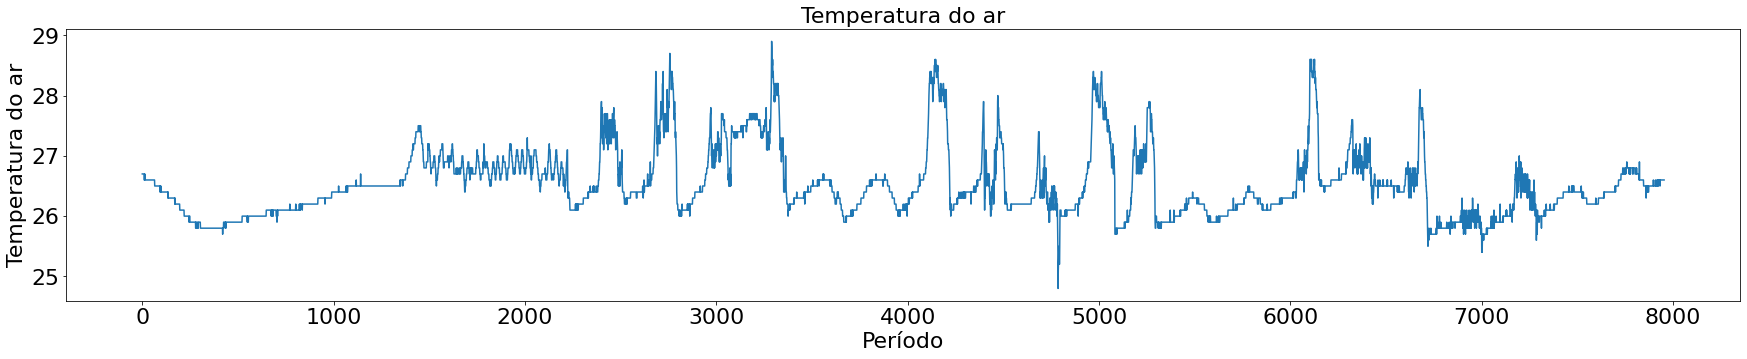

CPU times: user 641 ms, sys: 69.3 ms, total: 710 ms
Wall time: 740 ms


In [51]:
%%time
plt.figure(figsize=(30,5))
serie.temp_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Temperatura do ar',size=22)
plt.title('Temperatura do ar',size=22)

plt.savefig('data_temp_ar_conjunto_tratado_original.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

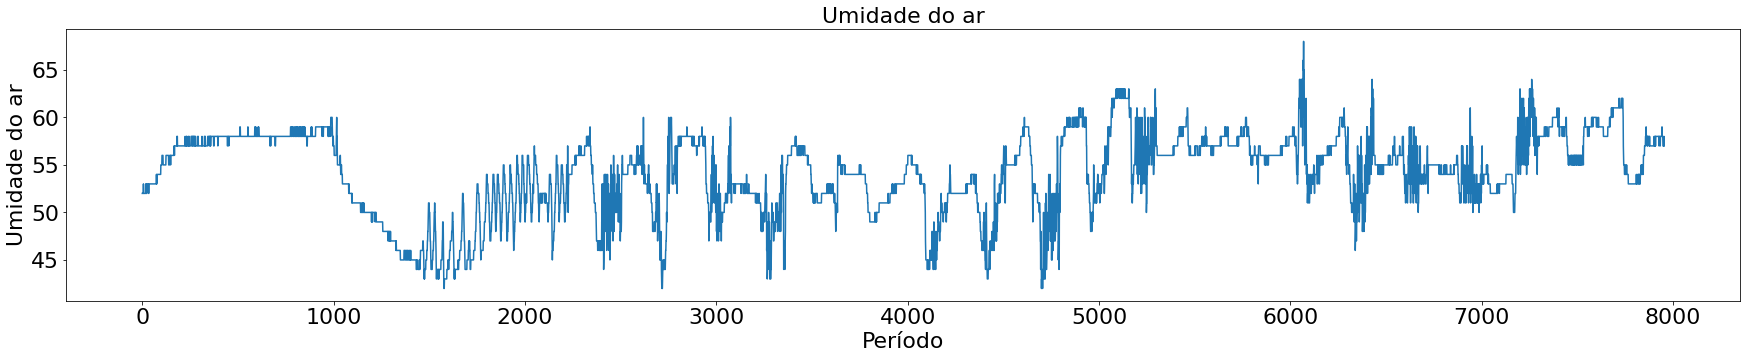

CPU times: user 431 ms, sys: 119 ms, total: 549 ms
Wall time: 430 ms


In [52]:
%%time
plt.figure(figsize=(30,5))
serie.umid_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Umidade do ar',size=22)
plt.title('Umidade do ar',size=22)

plt.savefig('data_umidade_ar_conjunto_tratado_original.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

# Criando dados a cada 5 minuto utilizando a média

Setando a data como index

In [53]:
serie.set_index('data', inplace=True)

In [54]:
serie

,temp_ar,umid_ar
data,,
2023-03-25 10:15:10,26.70,52.00
2023-03-25 10:14:28,26.70,52.00
2023-03-25 10:13:46,26.70,52.00
2023-03-25 10:13:04,26.70,52.00
2023-03-25 10:12:22,26.70,52.00
...,...,...
2023-03-04 00:24:21,26.60,57.00
2023-03-04 00:19:18,26.60,57.00
2023-03-04 00:14:16,26.60,57.00


Agrupando os valores de data para cada 5 minutos, os valores são preenchidos com a média

In [55]:
%%time
dados_agrupados_minutos = serie.resample('5T').mean()
dados_agrupados_minutos.head()

CPU times: user 1.32 s, sys: 0 ns, total: 1.32 s
Wall time: 1.33 s


,temp_ar,umid_ar
data,,
2023-03-04 00:00:00,26.60,57.00
2023-03-04 00:05:00,26.60,58.00
2023-03-04 00:10:00,26.60,57.00
2023-03-04 00:15:00,26.60,57.00
2023-03-04 00:20:00,26.60,57.00


Tamanho do conjunto gerado

In [56]:
dados_agrupados_minutos.shape

(6172, 2)

Verificando nulos

In [57]:
dados_agrupados_minutos.isnull().sum()

temp_ar    128
umid_ar    128
dtype: int64

Preenchendo nulos com os valores anteriores

In [58]:
dados_agrupados_minutos.fillna(method="ffill", inplace = True)

Verificando novamente os nulos

In [59]:
dados_agrupados_minutos.isnull().sum()

temp_ar    0
umid_ar    0
dtype: int64

# Gráficos

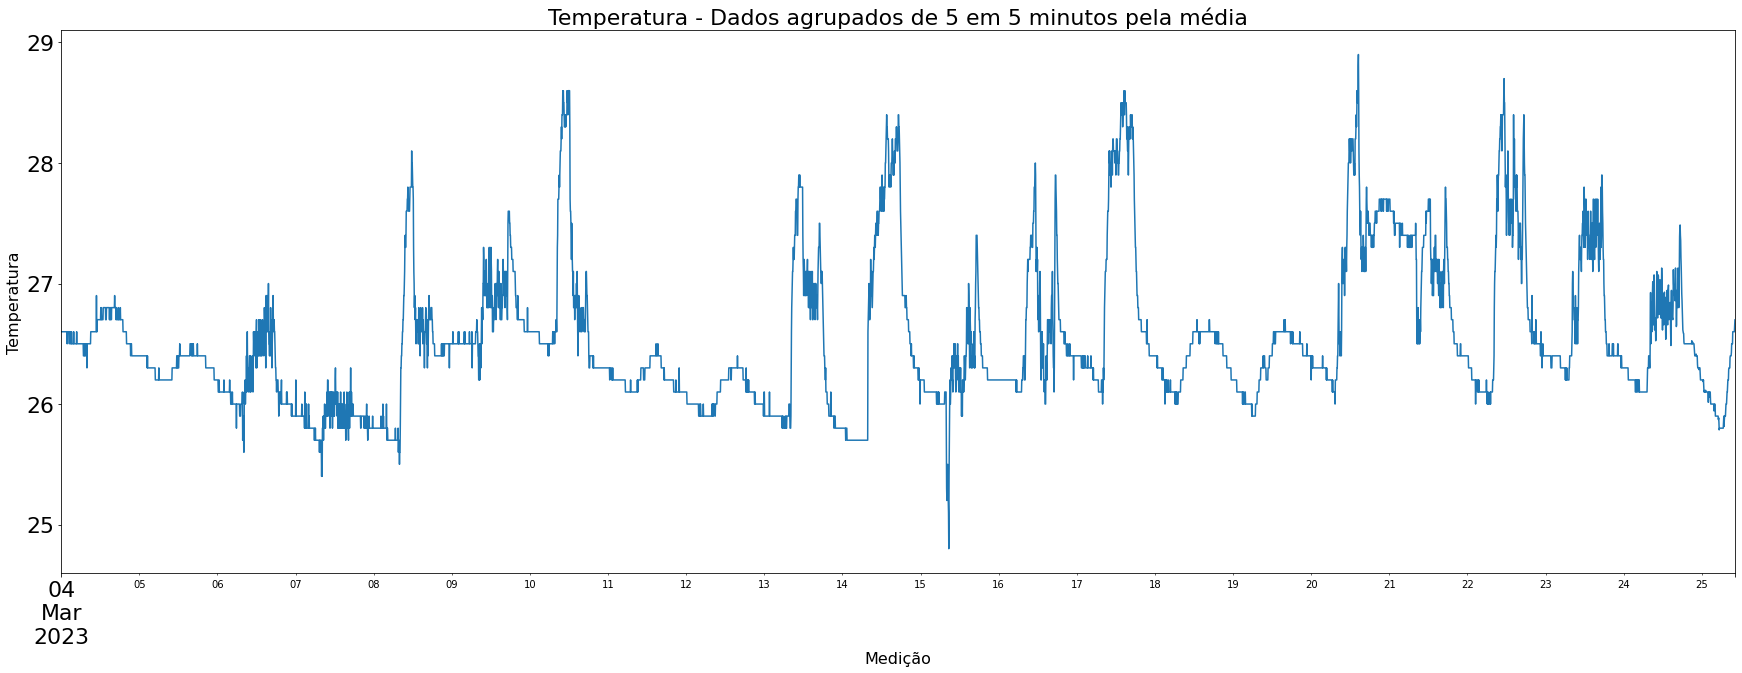

CPU times: user 1.13 s, sys: 51 ms, total: 1.18 s
Wall time: 1.19 s


In [60]:
%%time
plt.figure(figsize=(30,10))
dados_agrupados_minutos['temp_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=16)
plt.ylabel('Temperatura',size=16)
plt.title('Temperatura - Dados agrupados de 5 em 5 minutos pela média',size=22)

plt.savefig('data_temperatura_ar_conjunto_dados_agrupados_5_minutos.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

plt.show()

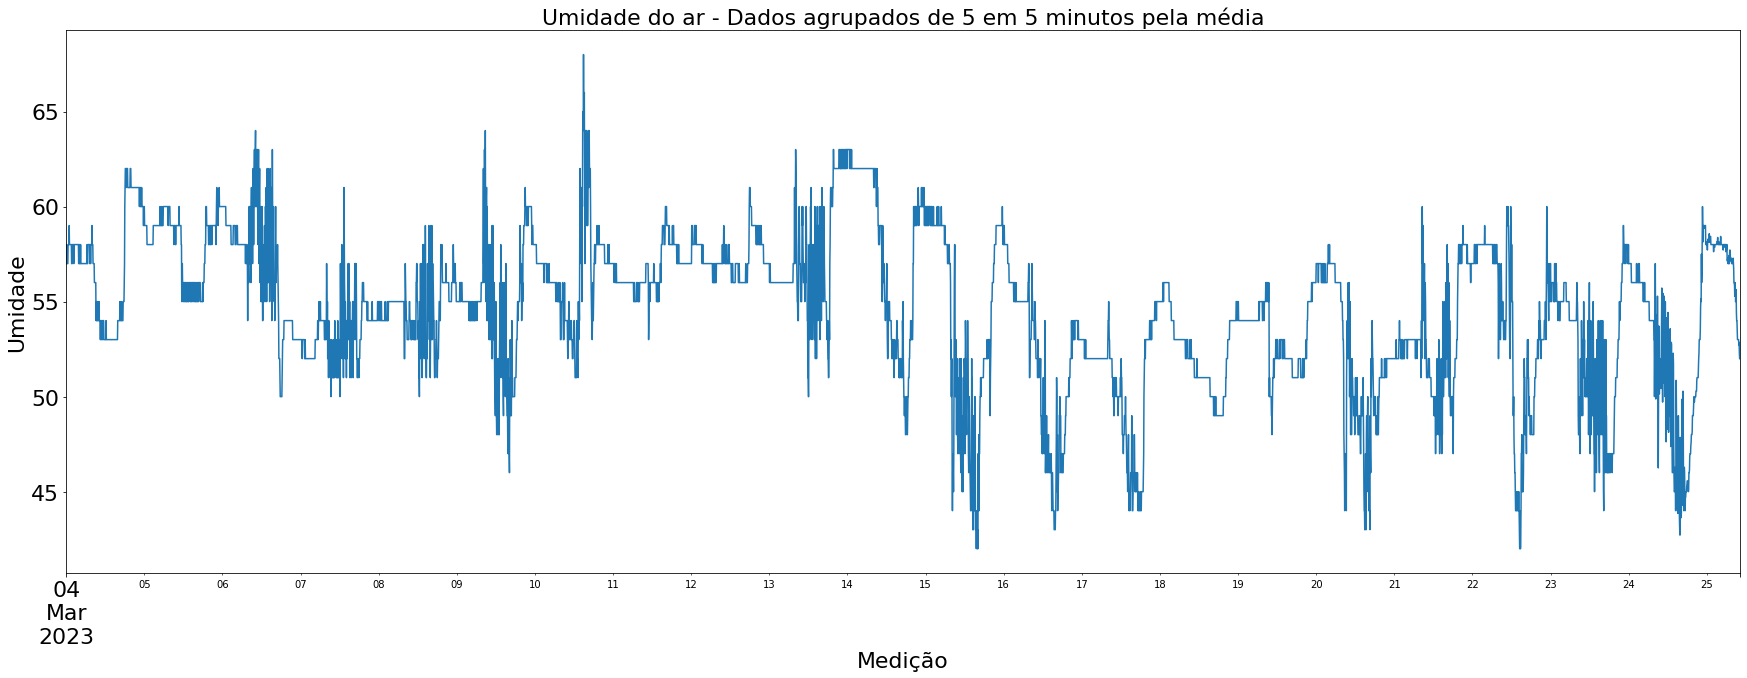

CPU times: user 695 ms, sys: 126 ms, total: 821 ms
Wall time: 712 ms


In [61]:
%%time
plt.figure(figsize=(30,10))
dados_agrupados_minutos['umid_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=22)
plt.ylabel('Umidade',size=22)
plt.title('Umidade do ar - Dados agrupados de 5 em 5 minutos pela média',size=22)

plt.savefig('data_umidade_ar_conjunto_dados_agrupados_5_minutos.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

plt.show()